# Working with Time Series Data Exercises

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### San Francisco Temps Exercises

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
#check dtype. if not datetime, must convert
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
#must complete step 2&3 (set date as index and sort)
sf_temps = sf_temps.set_index('date').sort_index()

In [5]:
#confirm steps 2&3 complete
type(sf_temps.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
sf_temps.resample('D').mean().head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


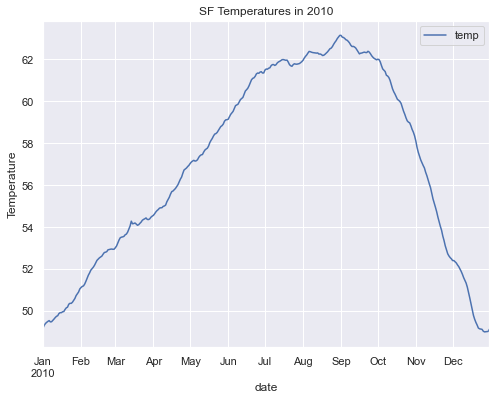

In [7]:
sf_temps.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

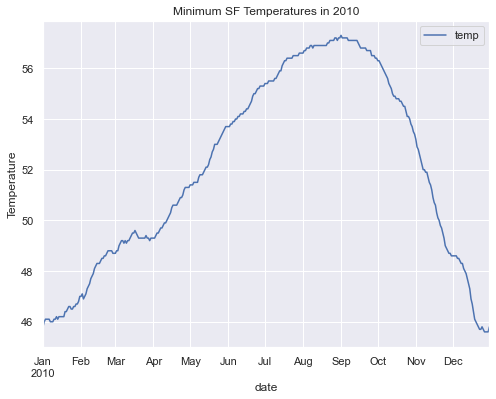

In [8]:
sf_temps.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

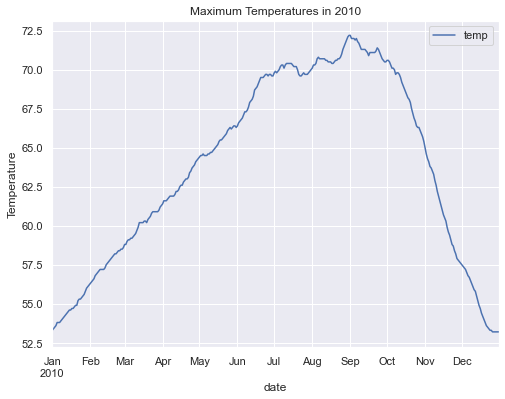

In [9]:
sf_temps.resample('D').max().plot()
plt.title('Maximum Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 4. Which month is the coldest, on average?
- answer: January (2010-01-31) 

In [10]:
sf_temps.temp.resample('M').mean().sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

In [11]:
average_temps = sf_temps.resample('M').mean()

In [12]:
average_temps.min()

temp   49.98
dtype: float64

#### 5. Which month has the highest average temperature?
- answer: September (2010-09-30) 

In [13]:
sf_temps.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

In [14]:
average_temps.max()

temp   62.49
dtype: float64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Answer: August (2010-08-31) with 15.00 degrees

In [15]:
#resample temps by day- add min max columns
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [16]:
#take a look
daily_temps

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


In [17]:
#create column that shows the temp difference between min and max
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [18]:
#make sure new column was created
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70
...,...,...,...
2010-12-27,45.60,53.20,7.60
2010-12-28,45.60,53.20,7.60
2010-12-29,45.60,53.20,7.60


In [19]:
#sort the values to see temp difference to answer question
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31   15.00
2010-09-30   14.90
2010-07-31   14.80
2010-06-30   14.80
2010-10-31   14.40
2010-05-31   13.10
2010-04-30   13.00
2010-03-31   12.00
2010-11-30   11.80
2010-02-28    9.90
2010-01-31    9.30
2010-12-31    8.90
Name: temp_diff, dtype: float64

#### 7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

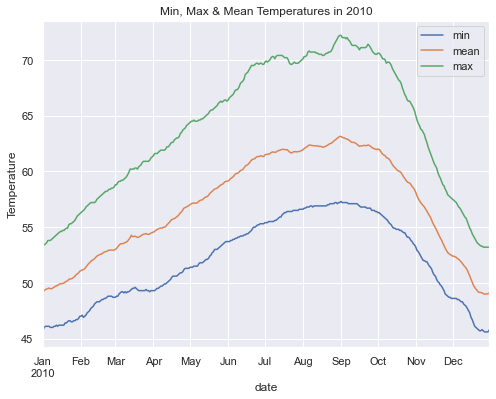

In [20]:
#resample temperatures by day- get min max and average
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<hr style="border:3px solid black"> </hr>

### Seatle Weather Exercises:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation

In [21]:
from vega_datasets import data
seatle = data.seattle_weather()
seatle

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [22]:
#make sure the dtype is correct
seatle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [23]:
#check the index- should be date
type(seatle.index)

#it is not, must change that

pandas.core.indexes.range.RangeIndex

In [24]:
#must complete step 2&3 (set date as index and sort)
seatle = seatle.set_index('date').sort_index()

In [25]:
#make sure index was reset
type(seatle.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### 1. Which year and month combination has the highest amount of precipitation?
- Answer: March 2015

In [26]:
seatle.precipitation.max()

55.9

In [27]:
seatle.precipitation.sort_values(ascending=False)

date
2015-03-15   55.90
2012-11-19   54.10
2015-12-08   54.10
2015-11-14   47.20
2014-03-05   46.70
              ... 
2014-05-14    0.00
2014-05-13    0.00
2014-05-12    0.00
2014-05-11    0.00
2012-01-01    0.00
Name: precipitation, Length: 1461, dtype: float64

#### 2. Visualize the amount of monthly precipitation over time.

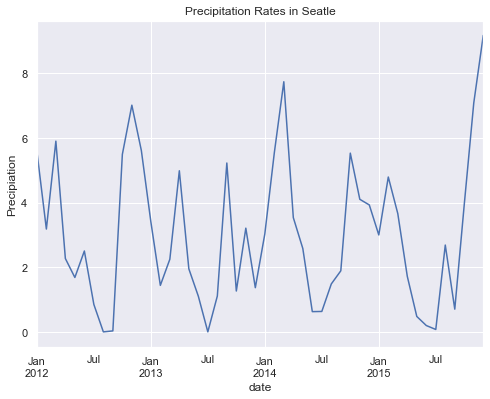

In [28]:
seatle.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seatle')
plt.ylabel('Precipiation')
plt.show()

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

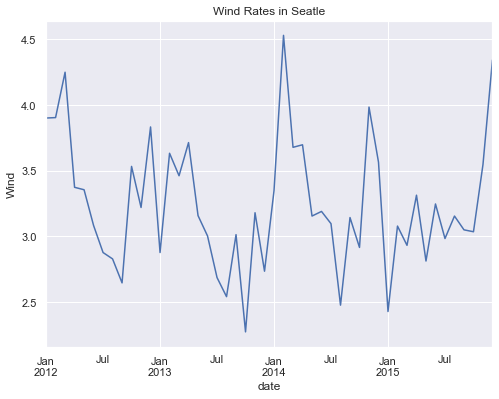

In [29]:
seatle.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seatle')
plt.ylabel('Wind')
plt.show()

#### 4. Which year-month combination is the windiest?
- Answer: December 2012 (2012-12-17) with 9.50

In [30]:
seatle.wind.sort_values(ascending=False)

date
2012-12-17   9.50
2013-12-01   8.80
2014-01-11   8.80
2012-01-21   8.20
2013-02-22   8.10
             ... 
2013-10-24   0.60
2013-11-25   0.50
2015-01-10   0.50
2013-12-26   0.50
2013-10-23   0.40
Name: wind, Length: 1461, dtype: float64

#### 5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)
- Answer: 2014 (2014-12-31) with 211 days of sun

In [31]:
#take a look at weather types
seatle.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [32]:
#see the counts for each type
seatle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [33]:
#create a column for days that are sunny
seatle['sunny_day'] = seatle.weather == 'sun'

In [34]:
#take a look at the new column
seatle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [35]:
#resample by year to answer question
seatle.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

#### 6. In which month does it rain the most?
- Answer: November (11) with 642.50 precipitation

In [36]:
#create a column for days that are sunny
seatle['rainy_day'] = seatle.weather == 'rain'

In [37]:
#take a look at the new column
seatle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True


In [38]:
#create column to identify month!
seatle['month'] = seatle.index.month

In [39]:
seatle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True,1


In [40]:
#resample by month to answer question
#this only gives me monthly totals individuals
seatle.rainy_day.resample('M').sum().sort_values(ascending=False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-04-30    19
2012-06-30    19
2012-03-31    19
2012-01-31    18
2013-03-31    18
2012-02-29    17
2012-10-31    17
2012-05-31    16
2013-01-31    16
2012-07-31    12
2012-09-30     4
2015-08-31     2
2012-08-31     2
2013-10-31     1
2014-10-31     1
2014-07-31     1
2014-08-31     1
2013-08-31     1
2015-01-31     1
2015-04-30     1
2015-10-31     1
2013-07-31     1
2013-04-30     0
2013-05-31     0
2013-06-30     0
2015-12-31     0
2013-09-30     0
2014-11-30     0
2015-09-30     0
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-12-31     0
2014-09-30     0
2013-11-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2014-01-31     0
2015-11-30     0
2013-12-31     0
Name: rainy_day, dtype: int64

In [41]:
#by month... descending precipiation amounts
seatle.groupby('month').precipitation.sum().sort_values(ascending=False)

month
11   642.50
12   622.70
3    606.20
10   503.40
1    466.00
2    422.00
4    375.40
9    235.50
5    207.50
8    163.70
6    132.90
7     48.20
Name: precipitation, dtype: float64

#### 7. Which month has the most number of days with a non-zero amount of precipitation

<hr style="border:3px solid black"> </hr>

### Flight Exercises:

In [42]:
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [43]:
#check dtypes
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [44]:
#check the index- should be date
type(seatle.index)

#is is already set correctly, must change that

pandas.core.indexes.datetimes.DatetimeIndex

#### 1. Convert any negative delays to 0.

In [45]:
flights['neg_delay'] = flights.delay < 0

In [46]:
#turn all neg values into 0
flights['delay'] = flights['delay'].apply(lambda x : x if x > 0 else 0)

In [47]:
#make sure it worked
flights

,date,delay,distance,origin,destination,neg_delay
0,2001-01-13 14:56:00,32,417,SAN,SJC,False
1,2001-01-31 16:40:00,0,1093,FLL,ISP,True
2,2001-02-11 18:39:00,3,293,LBB,DAL,False
3,2001-01-10 21:00:00,0,550,MSY,MCO,True
4,2001-03-30 21:45:00,0,229,STL,IND,True
...,...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK,False
19996,2001-01-19 13:05:00,0,1489,SEA,MCI,True
19997,2001-02-07 11:37:00,0,1848,MCO,PHX,True
19998,2001-02-24 16:50:00,42,443,RDU,BNA,False


In [48]:
#should not be any negative values
flights.delay.min()

0

#### 2. Which hour of the day has the highest average delay?
- Answer: 8pm (20) with 20126 minutes of delay

In [49]:
flights.groupby('date').delay.sum().sort_values(ascending=False)

date
2001-02-09 13:30:00    509
2001-03-29 19:04:00    391
2001-02-09 12:20:00    389
2001-02-23 03:25:00    360
2001-01-28 18:20:00    333
                      ... 
2001-02-05 17:05:00      0
2001-02-05 17:10:00      0
2001-02-05 17:20:00      0
2001-02-05 17:25:00      0
2001-02-15 09:15:00      0
Name: delay, Length: 14217, dtype: int64

In [52]:
#split hour from time
#create column to identify hour of day!
def hr_func(ts):
    return ts.hour

flights['time_hour'] = flights['date'].apply(hr_func)

In [53]:
#make sure column for hour was created
#flights

,date,delay,distance,origin,destination,neg_delay,time_hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,False,14
1,2001-01-31 16:40:00,0,1093,FLL,ISP,True,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,False,18
3,2001-01-10 21:00:00,0,550,MSY,MCO,True,21
4,2001-03-30 21:45:00,0,229,STL,IND,True,21
...,...,...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK,False,15
19996,2001-01-19 13:05:00,0,1489,SEA,MCI,True,13
19997,2001-02-07 11:37:00,0,1848,MCO,PHX,True,11
19998,2001-02-24 16:50:00,42,443,RDU,BNA,False,16


In [54]:
#by hour- find delays descending
flights.groupby('time_hour').delay.sum().sort_values(ascending=False)

#hour 20 has most delays

time_hour
20    20126
21    19875
19    19833
17    18849
18    18375
16    17157
15    16041
14    14036
13    13492
22    12068
12    11951
11     9062
10     6752
9      5993
8      5421
7      4356
23     4248
6      2425
0      1535
3       605
1       170
5        19
Name: delay, dtype: int64

#### 3. Does the day of the week make a difference in the delay amount?

#### 4. Does the month make a difference in the delay amount?